In [13]:
import numpy as np
import pandas as pd
import Bio
from Bio import PDB
from Bio.PDB import PDBParser
import matplotlib.pylab as plt
import os
from os import listdir
from os.path import isfile, join
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size' : 12})
rc('text', usetex=True)
%matplotlib notebook
from pypdb import *
import pickle

ModuleNotFoundError: No module named 'pypdb'

In [60]:
def parse_through_all_files(dirloc):
    '''
    Parses through all files in the directories for the 
    decoy datasets
    '''
    structure_master = {}
    os.chdir(dirloc)
    dirs = os.walk(dirloc)
    parser = PDBParser()
    for ele in dirs:
        dirname = ele[0]
        if ele[0].endswith("decoys"):
            ## This is the correct decoys directory
            os.chdir(ele[0]) ## change directory to correct one
            #folder_name = ele[0].split("/")[11]
            #rec_chains, lig_chains = [len(tmp) for tmp in folder_name.split("_")[1].split(":")]
            master_pdb_id = ele[0][100:104]
            decoy_pdbs = ele[2]
            temp_decoy_dict = {}
            for decoy in decoy_pdbs:
                pdb_name = decoy.split(".")[0]
                structure  = parser.get_structure(pdb_name, decoy)
                temp_reslist = []
                temp_coordlist = []
                for model in structure:
                    chain_list = []
                    for chain in model: 
                        for residues in chain:
                            count = 0
                            if residues.get_resname() not in "UNK":
                                temp_reslist.append(residues.get_resname()) ## appends the single letter AA code
                            for atom in residues:
                                if atom.get_name() in "CA":
                                    temp_coordlist.append(atom.get_coord())
                                    break
                temp_decoy_dict[pdb_name] = [temp_reslist, np.array(temp_coordlist)]
            structure_master[master_pdb_id] = temp_decoy_dict
    return structure_master

In [61]:
## testing the code

decoy_dir = "/Users/jakesumner/OneDrive/Desktop/Yale CBB/Fall 2022/Graph Deep Learning/Final Project/decoy/decoy"
all_dockground_decoys = parse_through_all_files(decoy_dir)

/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1046
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 2919
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:273: PDBConstructionWarning: WARNING: disordered atom found with blank altloc before line 346.

  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:273: PDBConstructionWarning: WARNING: disordered atom found with blank altloc before line 3868.

  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 7045
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:416

/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:127: PDBConstructionWarning: WARNING: Residue (' ', 186, ' ') redefined at line 3533.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:149: PDBConstructionWarning: WARNING: Residue (' ', 186, ' ','GLU') already defined with the same name at line  3533.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Atom CB defined twice in residue <Residue GLU het=  resseq=186 icode= > at line 3533.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Atom CG defined twice in residue <Residue GLU het=  resseq=186 icode= > at line 3534.
Exception ignored.
Some atoms or residues may be miss

/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:127: PDBConstructionWarning: WARNING: Residue (' ', 220, ' ') redefined at line 3732.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:149: PDBConstructionWarning: WARNING: Residue (' ', 220, ' ','CYS') already defined with the same name at line  3732.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Atom SG defined twice in residue <Residue CYS het=  resseq=220 icode= > at line 3732.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:127: PDBConstructionWarning: WARNING: Residue (' ', 217, ' ') redefined at line 3733.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.p

/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:127: PDBConstructionWarning: WARNING: Residue (' ', 186, ' ') redefined at line 3533.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:149: PDBConstructionWarning: WARNING: Residue (' ', 186, ' ','GLU') already defined with the same name at line  3533.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Atom CB defined twice in residue <Residue GLU het=  resseq=186 icode= > at line 3533.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Atom CG defined twice in residue <Residue GLU het=  resseq=186 icode= > at line 3534.
Exception ignored.
Some atoms or residues may be miss

/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:127: PDBConstructionWarning: WARNING: Residue (' ', 186, ' ') redefined at line 3533.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:149: PDBConstructionWarning: WARNING: Residue (' ', 186, ' ','GLU') already defined with the same name at line  3533.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Atom CB defined twice in residue <Residue GLU het=  resseq=186 icode= > at line 3533.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Atom CG defined twice in residue <Residue GLU het=  resseq=186 icode= > at line 3534.
Exception ignored.
Some atoms or residues may be miss

/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:127: PDBConstructionWarning: WARNING: Residue (' ', 186, ' ') redefined at line 3533.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:149: PDBConstructionWarning: WARNING: Residue (' ', 186, ' ','GLU') already defined with the same name at line  3533.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Atom CB defined twice in residue <Residue GLU het=  resseq=186 icode= > at line 3533.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Atom CG defined twice in residue <Residue GLU het=  resseq=186 icode= > at line 3534.
Exception ignored.
Some atoms or residues may be miss

/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:127: PDBConstructionWarning: WARNING: Residue (' ', 186, ' ') redefined at line 3533.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:149: PDBConstructionWarning: WARNING: Residue (' ', 186, ' ','GLU') already defined with the same name at line  3533.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Atom CB defined twice in residue <Residue GLU het=  resseq=186 icode= > at line 3533.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Atom CG defined twice in residue <Residue GLU het=  resseq=186 icode= > at line 3534.
Exception ignored.
Some atoms or residues may be miss

/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:127: PDBConstructionWarning: WARNING: Residue (' ', 186, ' ') redefined at line 3533.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:149: PDBConstructionWarning: WARNING: Residue (' ', 186, ' ','GLU') already defined with the same name at line  3533.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Atom CB defined twice in residue <Residue GLU het=  resseq=186 icode= > at line 3533.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Atom CG defined twice in residue <Residue GLU het=  resseq=186 icode= > at line 3534.
Exception ignored.
Some atoms or residues may be miss

/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:127: PDBConstructionWarning: WARNING: Residue (' ', 220, ' ') redefined at line 3732.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:149: PDBConstructionWarning: WARNING: Residue (' ', 220, ' ','CYS') already defined with the same name at line  3732.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Atom SG defined twice in residue <Residue CYS het=  resseq=220 icode= > at line 3732.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:127: PDBConstructionWarning: WARNING: Residue (' ', 217, ' ') redefined at line 3733.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.p

/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:127: PDBConstructionWarning: WARNING: Residue (' ', 186, ' ') redefined at line 3533.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:149: PDBConstructionWarning: WARNING: Residue (' ', 186, ' ','GLU') already defined with the same name at line  3533.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Atom CB defined twice in residue <Residue GLU het=  resseq=186 icode= > at line 3533.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Atom CG defined twice in residue <Residue GLU het=  resseq=186 icode= > at line 3534.
Exception ignored.
Some atoms or residues may be miss

/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:127: PDBConstructionWarning: WARNING: Residue (' ', 186, ' ') redefined at line 3533.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:149: PDBConstructionWarning: WARNING: Residue (' ', 186, ' ','GLU') already defined with the same name at line  3533.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Atom CB defined twice in residue <Residue GLU het=  resseq=186 icode= > at line 3533.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Atom CG defined twice in residue <Residue GLU het=  resseq=186 icode= > at line 3534.
Exception ignored.
Some atoms or residues may be miss

/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:127: PDBConstructionWarning: WARNING: Residue (' ', 186, ' ') redefined at line 3533.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:149: PDBConstructionWarning: WARNING: Residue (' ', 186, ' ','GLU') already defined with the same name at line  3533.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Atom CB defined twice in residue <Residue GLU het=  resseq=186 icode= > at line 3533.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Atom CG defined twice in residue <Residue GLU het=  resseq=186 icode= > at line 3534.
Exception ignored.
Some atoms or residues may be miss

/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:127: PDBConstructionWarning: WARNING: Residue (' ', 186, ' ') redefined at line 3533.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:149: PDBConstructionWarning: WARNING: Residue (' ', 186, ' ','GLU') already defined with the same name at line  3533.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Atom CB defined twice in residue <Residue GLU het=  resseq=186 icode= > at line 3533.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Atom CG defined twice in residue <Residue GLU het=  resseq=186 icode= > at line 3534.
Exception ignored.
Some atoms or residues may be miss

/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:127: PDBConstructionWarning: WARNING: Residue (' ', 220, ' ') redefined at line 3732.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:149: PDBConstructionWarning: WARNING: Residue (' ', 220, ' ','CYS') already defined with the same name at line  3732.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Atom SG defined twice in residue <Residue CYS het=  resseq=220 icode= > at line 3732.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:127: PDBConstructionWarning: WARNING: Residue (' ', 217, ' ') redefined at line 3733.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.p

/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:127: PDBConstructionWarning: WARNING: Residue (' ', 186, ' ') redefined at line 3533.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:149: PDBConstructionWarning: WARNING: Residue (' ', 186, ' ','GLU') already defined with the same name at line  3533.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Atom CB defined twice in residue <Residue GLU het=  resseq=186 icode= > at line 3533.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Atom CG defined twice in residue <Residue GLU het=  resseq=186 icode= > at line 3534.
Exception ignored.
Some atoms or residues may be miss

/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:127: PDBConstructionWarning: WARNING: Residue (' ', 186, ' ') redefined at line 3533.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:149: PDBConstructionWarning: WARNING: Residue (' ', 186, ' ','GLU') already defined with the same name at line  3533.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Atom CB defined twice in residue <Residue GLU het=  resseq=186 icode= > at line 3533.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Atom CG defined twice in residue <Residue GLU het=  resseq=186 icode= > at line 3534.
Exception ignored.
Some atoms or residues may be miss

/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:127: PDBConstructionWarning: WARNING: Residue (' ', 186, ' ') redefined at line 3533.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:149: PDBConstructionWarning: WARNING: Residue (' ', 186, ' ','GLU') already defined with the same name at line  3533.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Atom CB defined twice in residue <Residue GLU het=  resseq=186 icode= > at line 3533.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Atom CG defined twice in residue <Residue GLU het=  resseq=186 icode= > at line 3534.
Exception ignored.
Some atoms or residues may be miss

/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:127: PDBConstructionWarning: WARNING: Residue (' ', 186, ' ') redefined at line 3533.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:149: PDBConstructionWarning: WARNING: Residue (' ', 186, ' ','GLU') already defined with the same name at line  3533.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Atom CB defined twice in residue <Residue GLU het=  resseq=186 icode= > at line 3533.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Atom CG defined twice in residue <Residue GLU het=  resseq=186 icode= > at line 3534.
Exception ignored.
Some atoms or residues may be miss

/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:127: PDBConstructionWarning: WARNING: Residue (' ', 186, ' ') redefined at line 3533.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:149: PDBConstructionWarning: WARNING: Residue (' ', 186, ' ','GLU') already defined with the same name at line  3533.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Atom CB defined twice in residue <Residue GLU het=  resseq=186 icode= > at line 3533.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:416: PDBConstructionWarning: PDBConstructionException: Atom CG defined twice in residue <Residue GLU het=  resseq=186 icode= > at line 3534.
Exception ignored.
Some atoms or residues may be miss

/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:273: PDBConstructionWarning: WARNING: disordered atom found with blank altloc before line 346.

  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:273: PDBConstructionWarning: WARNING: disordered atom found with blank altloc before line 3868.

  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 7045
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 322
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 402
  warnings.warn(
/opt/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:395: 

In [63]:
print(len(all_dockground_decoys["1f51"]["r-l_66"][0]))

462


In [64]:
## Save data to a pickle file
# os.chdir(decoy_dir)

# save_file = open("all_dockground_decoy_datastructure.pickle", "wb")
# pickle.dump(all_dockground_decoys, save_file)

In [47]:
## Load in Data from Pickle File

os.chdir(decoy_dir)

all_dockground_decoys = pickle.load(open("all_dockground_decoy_datastructure.pickle", "rb"))

In [66]:
print(all_dockground_decoys.keys())

dict_keys(['1f51', '1tmq', '1uex', '2btf', '1avw', '1t6g', '2fi4', '1cho', '1e96', '2kai', '1xx9', '1g20', '1bui', '1he8', '1zy8', '1ook', '1ppf', '1ku6', '2bkr', '1fm9', '1w1i', '1akj', '2sni', '1bvn', '1gpq', '1xd3', '1s6v', '1f6m', '2bnq', '1gpw', '1oph', '3sic', '1u7f', '2goo', '1bth', '1wej', '1ugh', '1ezu', '1jps', '1dfj', '2a5t', '1wq1', '3pro', '1a2k', '1nbf', '1r4m', '1tx6', '3fap', '1ma9', '1l9b', '1yvb', '1he1', '1p7q', '1r0r', '2ckh', '1g6v', '1ewy', '1hxy', '1a2y'])


In [65]:
## Create graphs from the atomic coordinates

print(len(sorted(all_dockground_decoys["1f51"].keys())))

114


In [38]:
## Get the total dataset size

print(all_dockground_decoys["1f51"].keys())


dict_keys(['r-l_100', 'r-l_66', 'r-l_72', 'r-l_99', 'r-l_98', 'r-l_73', 'r-l_67', 'r-l_9', 'r-l_71', 'r-l_65', 'r-l_59', 'r-l_58', 'r-l_64', 'r-l_70', 'r-l_8', 'r-l_48', 'r-l_74', 'r-l_60', 'r-l_149576', 'r-l_61', 'r-l_75', 'r-l_49', 'r-l_330420', 'r-l_63', 'r-l_211605', 'r-l_77', 'r-l_88', 'r-l_123949', 'r-l_89', 'r-l_76', 'r-l_62', 'r-l_11', 'r-l_39', '1f51_p1', 'r-l_274005', 'r-l_38', 'r-l_10', 'r-l_12', '1f51_p2', 'r-l_13', 'r-l_17', 'r-l_214867', 'r-l_16', 'r-l_28', 'r-l_14', 'r-l_15', 'r-l_29', 'r-l_325068', 'r-l_24', 'r-l_30', 'r-l_18', 'r-l_19', 'r-l_31', 'r-l_25', 'r-l_220107', 'r-l_33', 'r-l_27', 'r-l_26', 'r-l_32', 'r-l_36', 'r-l_22', 'r-l_23', 'r-l_37', 'r-l_21', 'r-l_35', 'r-l_307434', 'r-l_34', 'r-l_20', 'r-l_3', 'r-l_47', 'r-l_53', 'r-l_84', 'r-l_90', 'r-l_239998', 'r-l_91', 'r-l_85', 'r-l_52', 'r-l_46', 'r-l_2', 'r-l_50', 'r-l_44', 'r-l_78', 'r-l_93', 'r-l_87', 'r-l_86', 'r-l_92', 'r-l_79', 'r-l_45', 'r-l_51', 'r-l_1', 'r-l_5', 'r-l_69', 'r-l_55', 'r-l_41', 'r-l_96', 'r

In [69]:
## Splitting the decoys into clear receptor, ligand groups in the dictionary

dockground_decoys_only = {}
for key in list(all_dockground_decoys.keys()):
    temp_helplist = sorted(list(all_dockground_decoys[key].keys()))[:5]
    receptor_len = len(all_dockground_decoys[key][temp_helplist[2]][0]) ## gets length of receptor (unbound)
    ligand_len = len(all_dockground_decoys[key][temp_helplist[3]][0]) ## gets length of ligand (unbound)
    test_decoy_len = len(all_dockground_decoys[key][temp_helplist[4]][0]) ## gets length of decoy
    temp_decoy_dict = {}
    for decoy_key in list(all_dockground_decoys[key].keys()):
        if decoy_key[0] in "r":
            ## It is a decoy
            temp_reslist = all_dockground_decoys[key][decoy_key][0]
            temp_coords = all_dockground_decoys[key][decoy_key][1]
            temp_decoy_dict[decoy_key] = [temp_reslist[:receptor_len], temp_coords[:receptor_len], temp_reslist[receptor_len:], temp_coords[receptor_len:]]
    dockground_decoys_only[key] = temp_decoy_dict

In [16]:
print(len(dockground_decoys_only["1f51"]["r-l_23"][1]))
print(len(dockground_decoys_only["1f51"]["r-l_23"][3]))

343
581


In [70]:
# ## Save data to a pickle file
os.chdir(decoy_dir)

save_file = open("dockground_decoys_only_datastructure.pickle", "wb")
pickle.dump(dockground_decoys_only, save_file)
save_file.close()

In [101]:
print(dockground_decoys_only["1f51"]["r-l_23"][1].shape)

(343, 3)


In [2]:
## Load in data from pickle file
decoy_dir = "/Users/jakesumner/OneDrive/Desktop/Yale CBB/Fall 2022/Graph Deep Learning/Final Project/decoy/decoy"
os.chdir(decoy_dir)

open_file = open("dockground_decoys_only_datastructure.pickle", "rb")
dockground_decoys_only = pickle.load(open_file)
open_file.close()

In [3]:
print(dockground_decoys_only.keys())

dict_keys(['1f51', '1tmq', '1uex', '2btf', '1avw', '1t6g', '2fi4', '1cho', '1e96', '2kai', '1xx9', '1g20', '1bui', '1he8', '1zy8', '1ook', '1ppf', '1ku6', '2bkr', '1fm9', '1w1i', '1akj', '2sni', '1bvn', '1gpq', '1xd3', '1s6v', '1f6m', '2bnq', '1gpw', '1oph', '3sic', '1u7f', '2goo', '1bth', '1wej', '1ugh', '1ezu', '1jps', '1dfj', '2a5t', '1wq1', '3pro', '1a2k', '1nbf', '1r4m', '1tx6', '3fap', '1ma9', '1l9b', '1yvb', '1he1', '1p7q', '1r0r', '2ckh', '1g6v', '1ewy', '1hxy', '1a2y'])


In [71]:
## Get the RMSD Lists for each of the decoys

def parse_through_rmsd_lists(dirloc):
    '''
    Parses through all files in the directories for the 
    decoy datasets
    '''
    rmsd_master = {}
    os.chdir(dirloc)
    dirs = os.walk(dirloc)
    parser = PDBParser()
    for ele in dirs:
        dirname = ele[0]
        if ":" in ele[0][100:108] and not ele[0].endswith("decoys"):
            ## This is the directory with the rmsd list
            os.chdir(ele[0]) ## change directory to correct one
            master_pdb_id = ele[0][100:104]
            decoy_pdbs = ele[2]
            temp_decoy_dict = {}
            rmsd_file = open("rmsd.list", "r")
            for line in rmsd_file:
                line = line.split()
                rank, r_rmsd, l_rmsd, i_rmsd, fnat, fnon_nat = line
                temp_decoy_dict[f"r-l_{rank}"] = [float(r_rmsd), float(l_rmsd), float(i_rmsd), float(fnat), float(fnon_nat)]
            rmsd_master[master_pdb_id] = temp_decoy_dict
            rmsd_file.close()
    return rmsd_master

In [72]:
## testing the code

decoy_dir = "/Users/jakesumner/OneDrive/Desktop/Yale CBB/Fall 2022/Graph Deep Learning/Final Project/decoy/decoy"
all_dockground_decoy_rmsd = parse_through_rmsd_lists(decoy_dir)

In [73]:
print(all_dockground_decoy_rmsd.keys())
print(all_dockground_decoy_rmsd["1f51"]["r-l_10"])

dict_keys(['1f51', '1tmq', '1uex', '2btf', '1avw', '1t6g', '2fi4', '1cho', '1e96', '2kai', '1xx9', '1g20', '1bui', '1he8', '1zy8', '1ook', '1ppf', '1ku6', '2bkr', '1fm9', '1w1i', '1akj', '2sni', '1bvn', '1gpq', '1xd3', '1s6v', '1f6m', '2bnq', '1gpw', '1oph', '3sic', '1u7f', '2goo', '1bth', '1wej', '1ugh', '1ezu', '1jps', '1dfj', '2a5t', '1wq1', '3pro', '1a2k', '1nbf', '1r4m', '1tx6', '3fap', '1ma9', '1yvb', '1he1', '1p7q', '1r0r', '2ckh', '1g6v', '1ewy', '1hxy', '1a2y'])
[1.51, 54.01, 23.74, 0.0, 1.0]


In [74]:
## Save data to a pickle file
os.chdir(decoy_dir)

save_file = open("dockground_decoys_rmsds.pickle", "wb")
pickle.dump(all_dockground_decoy_rmsd, save_file)
save_file.close()

# Analysis of the Dockground Dataset

In [6]:
## Analysis of the dataset
'''
1. Look at graph size (size of the proteins)
    a. look at the average protein length for the receptors, the ligands YES 
2. Look at the average RMSD of the proteins for each structure from the native structure YES
3. Look at the split of data that is acceptable vs not acceptable in order to get an idea of 'good' models or not
    a. Acceptable: fnat≥0.3 and L-RMSD>5.0  AND  I-RMSD>2.0
4. Look at the degree of amino acids at the interfaces
'''


def create_prob_dist_identical_bins(data, fig, ax, bins = None, n_bins = 100, color = "black", label = None, alpha = 1.0, marker = "o"):
    '''
    plots a probability distribution from the data provided
    '''
    if bins.all() == None:
        bins = np.linspace(min(data),max(data),n_bins)
    
    n, bins, patches = ax.hist(data, bins=bins, density=True, histtype= "step", alpha = 0)
    bins = np.delete(bins, -1)
    bins += abs(bins[1]-bins[0])/2
    
    plt.plot(bins, n, marker=marker, color=color, markerfacecolor='none', label = label, alpha = alpha)
    
    x = np.array(bins)
    y = np.array(n)
    
    return y

def create_minmax_bins(dist1, dist2, nbins):
    '''
    Creates Min Max bins for easy plotting of probability
    distributions. With slight over and underestimation in order
    to get the distributions to go to zero at the ends, because
    that is necessary
    '''
    
    glob_min = min(min(dist1), min(dist2))
    glob_max = max(max(dist1), max(dist2))
    diff = (glob_max - glob_min) * ((2/nbins)*1.1)
    return np.linspace(glob_min-diff, glob_max+diff, nbins)

In [8]:
## Briefly get total dataset size

total_decoy_counts = []
for key in dockground_decoys_only.keys():
    temp_count = 0
    for decoy_key in dockground_decoys_only[key].keys():
        temp_count += 1
    total_decoy_counts.append(temp_count)

In [92]:
print(sum(total_decoy_counts))

6385


## Getting protein size distributions

In [94]:
## Gathering all the protein lengths in a list

prot_lengths_all = []
prot_lengths_rec = []
prot_lengths_lig = []
for key in dockground_decoys_only.keys():
    temp_count = 0
    for decoy_key in dockground_decoys_only[key].keys():
        rec = len(dockground_decoys_only[key][decoy_key][0])
        lig = len(dockground_decoys_only[key][decoy_key][2])
        prot_lengths_rec.append(rec)
        prot_lengths_lig.append(lig)
        prot_lengths_all.append(rec+lig)

In [95]:
print(min(prot_lengths_rec))

103


<IPython.core.display.Javascript object>


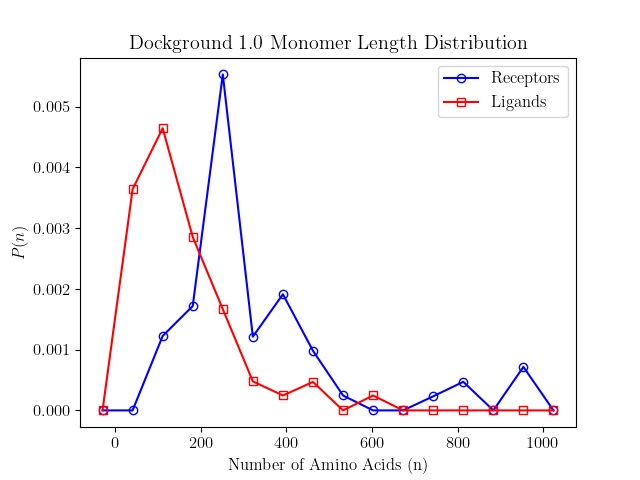

In [96]:
## Receptor, ligand, and all protein lengths plotted

fig = plt.Figure()
ax = fig.add_subplot()

nbins = 17
bins = create_minmax_bins(prot_lengths_rec, prot_lengths_lig, nbins)

x = create_prob_dist_identical_bins(prot_lengths_rec, fig, ax, bins = bins, color = "blue", label = "Receptors", alpha = 1.0, marker = "o")
x = create_prob_dist_identical_bins(prot_lengths_lig, fig, ax, bins = bins, color = "red", label = "Ligands", alpha = 1.0, marker = "s")

plt.title("Dockground 1.0 Monomer Length Distribution")
plt.xlabel("Number of Amino Acids (n)")
plt.ylabel("$P(n)$")
plt.legend()

<IPython.core.display.Javascript object>


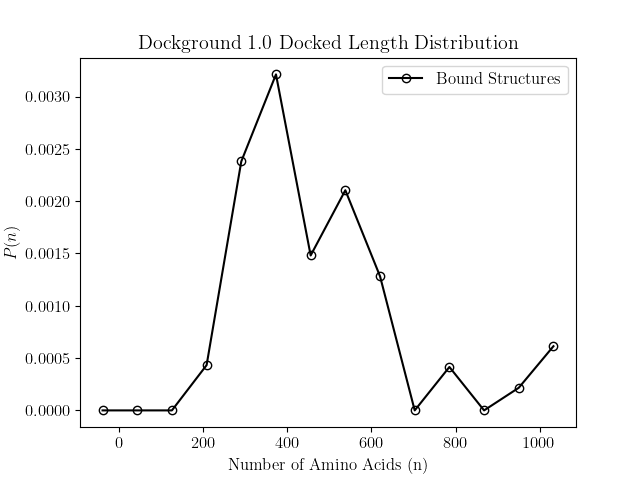

In [97]:
## Receptor, ligand, and all protein lengths plotted

fig = plt.Figure()
ax = fig.add_subplot()

nbins = 15
bins = create_minmax_bins(prot_lengths_rec, prot_lengths_lig, nbins)

x = create_prob_dist_identical_bins(prot_lengths_all, fig, ax, bins = bins, color = "black", label = "Bound Structures", alpha = 1.0, marker = "o")
#x = create_prob_dist_identical_bins(prot_lengths_lig, fig, ax, bins = bins, color = "red", label = "Ligands", alpha = 1.0, marker = "s")

plt.title("Dockground 1.0 Docked Length Distribution")
plt.xlabel("Number of Amino Acids (n)")
plt.ylabel("$P(n)$")
plt.legend()

## Getting RMSD Distributions

In [98]:
## Gathering all the Decoy RMSDs in a list

decoy_rmsd_rec = []
decoy_rmsd_lig = []
decoy_rmsd_int = []
decoy_fnat = []

temp_count = 0
for key in all_dockground_decoy_rmsd.keys():
    
    for decoy_key in all_dockground_decoy_rmsd[key].keys():
        temp_count += 1
        rec = all_dockground_decoy_rmsd[key][decoy_key][0]
        lig = all_dockground_decoy_rmsd[key][decoy_key][1]
        inter = all_dockground_decoy_rmsd[key][decoy_key][2]
        fnat = all_dockground_decoy_rmsd[key][decoy_key][3]

        decoy_rmsd_rec.append(rec)
        decoy_rmsd_lig.append(lig)
        decoy_rmsd_int.append(inter)
        decoy_fnat.append(fnat)

<IPython.core.display.Javascript object>


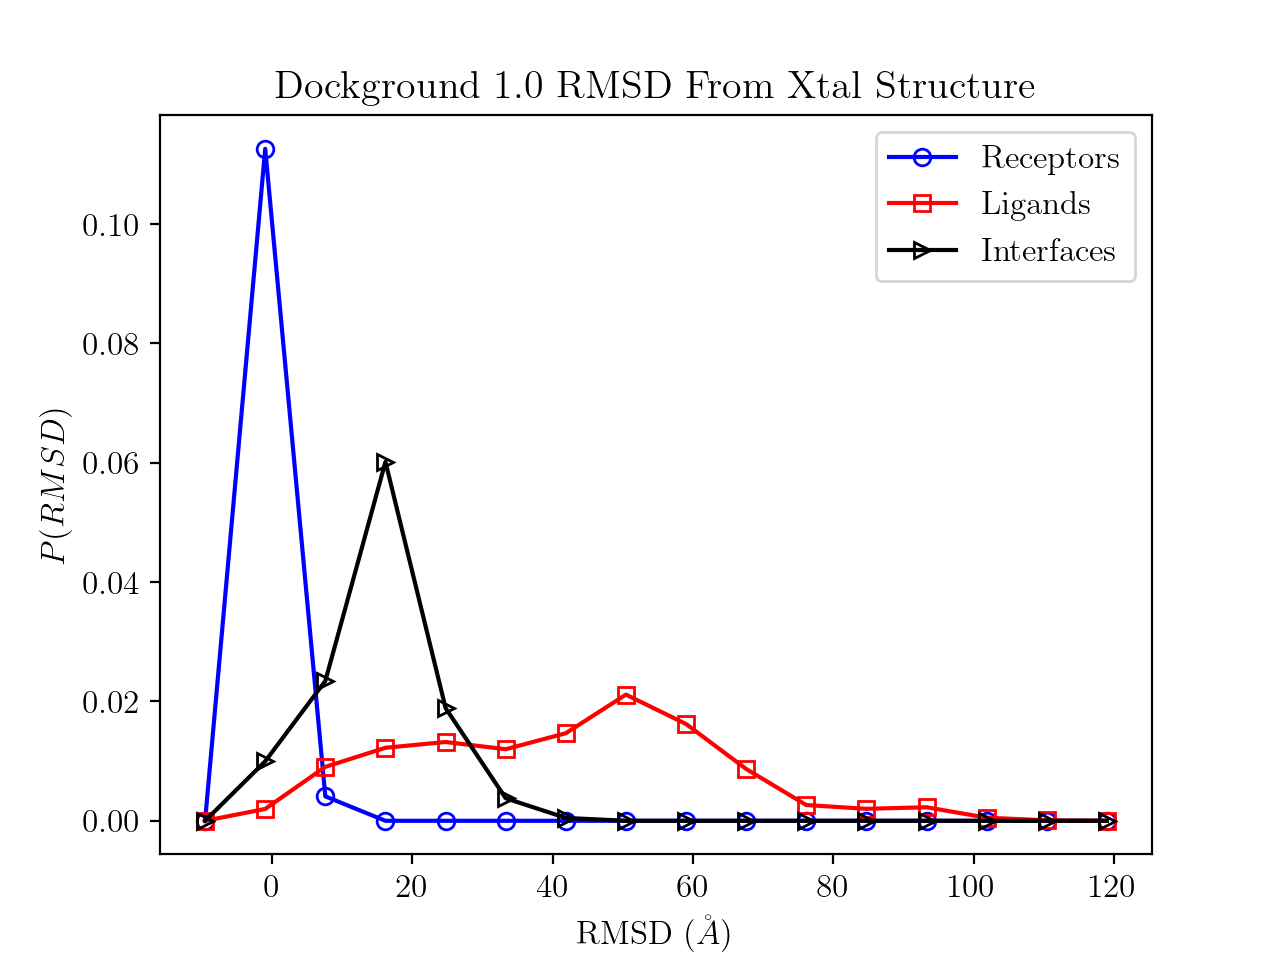

In [82]:
## Receptor, ligand, and all protein lengths plotted

fig = plt.Figure()
ax = fig.add_subplot()

nbins = 17
bins = create_minmax_bins(decoy_rmsd_rec, decoy_rmsd_lig, nbins)

x = create_prob_dist_identical_bins(decoy_rmsd_rec, fig, ax, bins = bins, color = "blue", label = "Receptors", alpha = 1.0, marker = "o")
x = create_prob_dist_identical_bins(decoy_rmsd_lig, fig, ax, bins = bins, color = "red", label = "Ligands", alpha = 1.0, marker = "s")
x = create_prob_dist_identical_bins(decoy_rmsd_int, fig, ax, bins = bins, color = "black", label = "Interfaces", alpha = 1.0, marker = ">")

plt.title("Dockground 1.0 RMSD From Xtal Structure")
plt.xlabel("RMSD ($Å$)")
plt.ylabel("$P(RMSD)$")
plt.legend()

In [100]:
decoy_fnat = np.array(decoy_fnat)
print(len(decoy_fnat[decoy_fnat>1.00]))

129


<IPython.core.display.Javascript object>


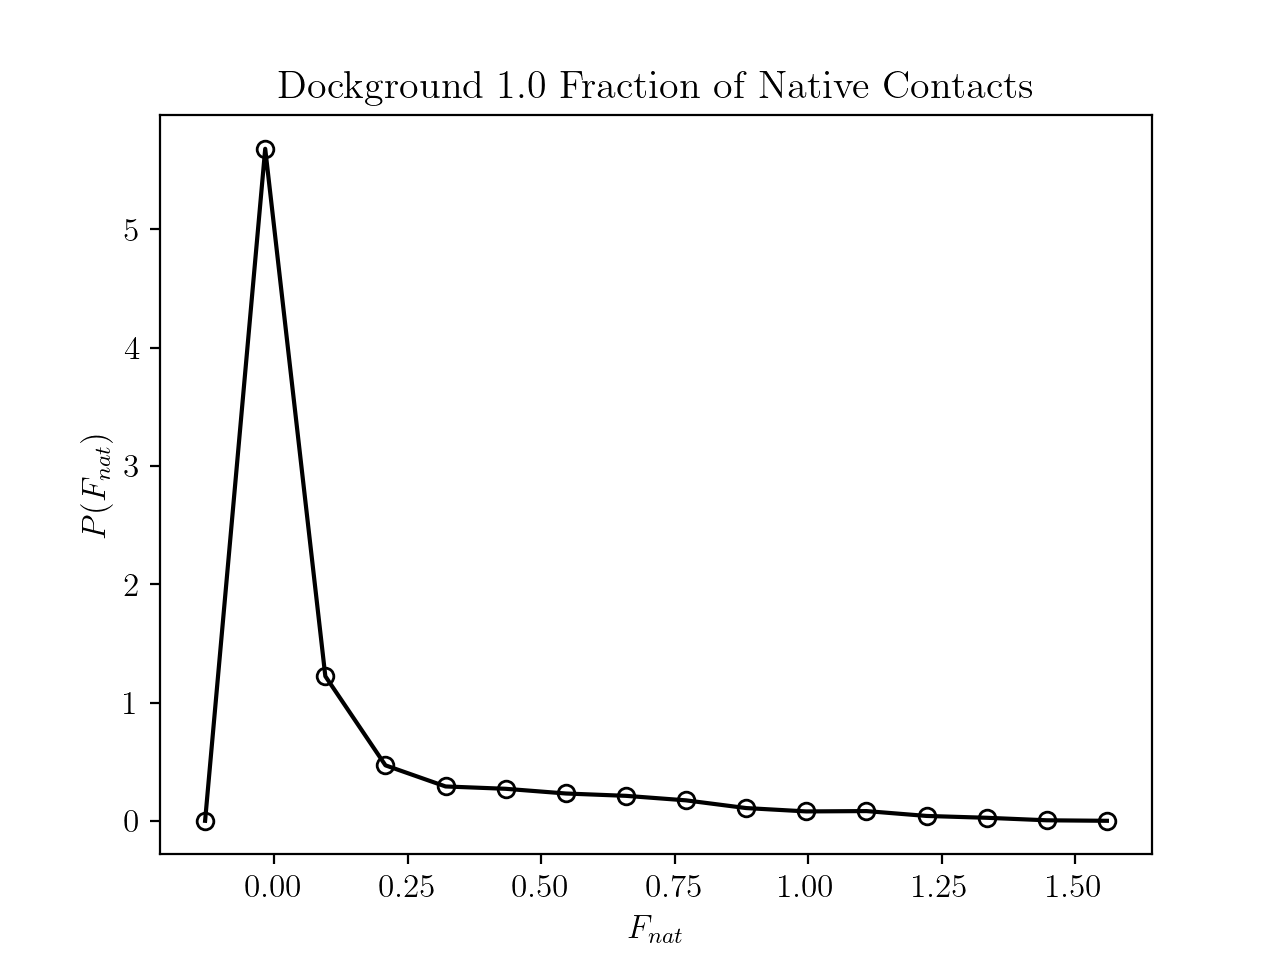

Text(0, 0.5, '$P(F_{nat})$')

In [85]:
## Receptor, ligand, and all protein lengths plotted

fig = plt.Figure()
ax = fig.add_subplot()

nbins = 17
bins = create_minmax_bins(decoy_fnat, decoy_fnat, nbins)

x = create_prob_dist_identical_bins(decoy_fnat, fig, ax, bins = bins, color = "black", label = None, alpha = 1.0, marker = "o")
 
plt.title("Dockground 1.0 Fraction of Native Contacts")
plt.xlabel("$F_{nat}$")
plt.ylabel("$P(F_{nat})$")
#plt.legend()

## Plotting acceptable vs unacceptable models (for reference of data quality in dataset)


Acceptable: fnat≥0.3 and L-RMSD>5.0  AND  I-RMSD>2.0

In [88]:
decoy_rmsd_rec
decoy_rmsd_lig
decoy_rmsd_int
decoy_fnat

acceptable_list = np.zeros((len(decoy_fnat), 1))
for i in range(len(decoy_rmsd_rec)):
    if decoy_fnat[i] >= 0.3 and decoy_rmsd_lig[i] > 5.0 and decoy_rmsd_int[i] > 2.0:
        acceptable_list[i] = 1

In [89]:
print(sum(acceptable_list)/len(acceptable_list))

[0.08366534]


## Trying to make graphs for the love of god

In [89]:
## Make simple graphs from the decoys using the interfaces and see what the node degrees are.

test_adj_matrices = []

def process_decoys_for_adj_matrices(decoy_dict):
    '''
    Makes interfaces for the receptor vs the ligand as an adjacency matrix
    '''
    global test_adj_matrices
    adj_matrices = test_adj_matrices
    for key in decoy_dict.keys():
        for decoy_key in decoy_dict[key].keys():
            rec_len = len(decoy_dict[key][decoy_key][0])
            lig_len = len(decoy_dict[key][decoy_key][2])
            total_len = rec_len + lig_len
            temp_A1 = np.zeros((total_len, total_len))
            temp_A2 = np.zeros((total_len, total_len))
            for i, coord_i in enumerate(decoy_dict[key][decoy_key][1]):
                for j, coord_j in enumerate(decoy_dict[key][decoy_key][3]):
                    dist = np.linalg.norm(coord_i - coord_j)
                    try:
                        if dist <= 14:
                            temp_adj_matrix[i][j] = 1
                    except:
                        print(i,j, len(decoy_dict[key][decoy_key][1]), len(decoy_dict[key][decoy_key][3]))
                        break
                        
            adj_matrices.append(temp_adj_matrix)
    return adj_matrices

def create_adjacency_matrices(rec, lig):
    '''
    Creates A1 and A2 adjacency matrices from the inputted 
    receptor (rec) and ligand (lig). A2 = A1 + interface edges,
    so both include covalent bonding between residues
    '''
    ## Get lengths for easy referecing
    rec_len = len(rec)
    lig_len = len(lig)
    total_len = rec_len + lig_leg
    combined_coords = np.zeros((total_len, 3))
    combined_coords[:rec_len, :] = rec
    combined_coords[rec_len:, :] = lig
    
    temp_A1 = np.zeros((total_len, total_len))
    temp_A2 = np.zeros((total_len, total_len))
    
    for i in range(total_len):
        for j in range(i,total_len): ## only focus on half of the matrix to save loops
            
            ## They are the same node - self edge
            if i==j:
                temp_A1[i,j] = 1
                temp_A2[i,j] = 1
            ## They are covalently bonded - edge at i,j and j,i - symmetric
            elif j==i+1:
                if i == rec_len or i == rec_len - 1:
                    ## This is the end of the receptor - no edge
                    pass
                temp_A1[i,j] = 1
                temp_A2[i,j] = 1
                temp_A1[j,i] = 1
                temp_A2[j,i] = 1
            else:
                ## Check distances
                if (i < rec_len and j >= rec_len):
                    ## Both are from different chains
                    distance = 

In [90]:
all_adj_matrices = create_interfaces(dockground_decoys_only)

119 60 343 119
273 48 343 119


KeyboardInterrupt: 

In [91]:
print(np.sum(test_adj_matrices[0]))
print(test_adj_matrices[0].size)

88.0
40817


In [1]:
# Dockground Set 2 Data## NPZ data

from data_processing.Single_Dataset import Single_Dataset
from torch.utils.data import DataLoader
from data_processing.collate_fn import collate_fn_Jake
import os
from os import listdir
from os.path import isfile, join
import numpy as np
import matplotlib.pyplot as plt

input_path = "/mnt/c/Users/jaket/Documents/GNN_DOVE_DATA/dockground_set_2_npz"

list_npz = [f for f in listdir(input_path) if isfile(join(input_path, f)) and f.endswith(".npz")]

test_data = Single_Dataset(list_npz)

BATCH_SIZE = 1

test_loader = DataLoader(test_data, BATCH_SIZE, shuffle=False,
                        num_workers=7,
                        drop_last=False, collate_fn=collate_fn_Jake)

In [2]:
print(len(test_loader))

1144


In [3]:
data_list = []
os.chdir(input_path)
for ele in test_loader:
    H, A1, A2, V, Y, Atom_count = ele
    H, A1, A2, V, Y, Atom_count = H.numpy()[0], A1.numpy()[0], A2.numpy()[0], V.numpy()[0], Y.numpy()[0], Atom_count.numpy()[0]
    receptor_len = sum(V)
    ligand_len = V.shape[0] - receptor_len
    data_list.append([receptor_len, ligand_len])

In [4]:
print(len(data_list))

1144


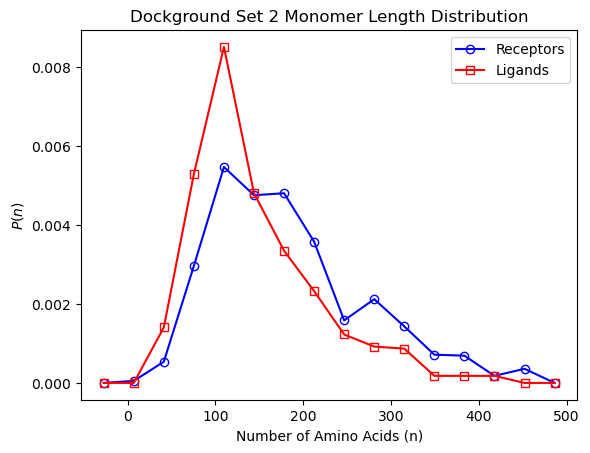

In [7]:
## Receptor, ligand, and all protein lengths plotted

fig = plt.Figure()
ax = fig.add_subplot()


nbins = 17
bins = create_minmax_bins([ele[0] for ele in data_list], [ele[1] for ele in data_list], nbins)

x = create_prob_dist_identical_bins([ele[0] for ele in data_list], fig, ax, bins = bins, color = "blue", label = "Receptors", alpha = 1.0, marker = "o")
x = create_prob_dist_identical_bins([ele[1] for ele in data_list], fig, ax, bins = bins, color = "red", label = "Ligands", alpha = 1.0, marker = "s")

plt.title("Dockground Set 2 Monomer Length Distribution")
plt.xlabel("Number of Amino Acids (n)")
plt.ylabel("$P(n)$")
plt.legend()

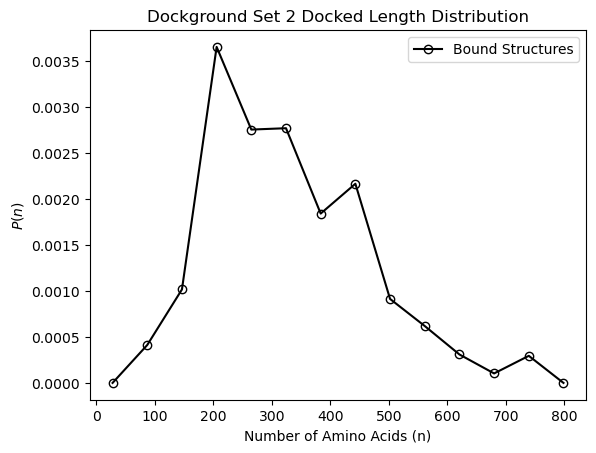

In [8]:
## Receptor, ligand, and all protein lengths plotted

fig = plt.Figure()
ax = fig.add_subplot()

nbins = 15
bins = create_minmax_bins([ele[0]+ele[1] for ele in data_list], [ele[0]+ele[1] for ele in data_list], nbins)

x = create_prob_dist_identical_bins([ele[0]+ele[1] for ele in data_list], fig, ax, bins = bins, color = "black", label = "Bound Structures", alpha = 1.0, marker = "o")
#x = create_prob_dist_identical_bins(prot_lengths_lig, fig, ax, bins = bins, color = "red", label = "Ligands", alpha = 1.0, marker = "s")

plt.title("Dockground Set 2 Docked Length Distribution")
plt.xlabel("Number of Amino Acids (n)")
plt.ylabel("$P(n)$")
plt.legend()